In [3]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.signal as ss
import math
from detecta import detect_peaks

In [9]:
df = pd.read_csv("Example_Inputs/UncertaintyDf.csv")

,Unnamed: 0,formula,mz,observed,peak
0,2,O3N-,61.988366,61.988375,5.0
1,3,O3N[15]-,62.985401,62.985417,7.0
2,4,O2O[17]N-,62.992584,62.992609,8.0
3,5,O2O[18]N-,63.992613,63.992625,9.0
4,7,C3H5O2-,73.029503,73.029526,17.0
...,...,...,...,...,...
122,275,C10H16O10N-,310.077969,310.077786,205.0
123,280,C11H16O10N-,322.077969,322.077941,207.0
124,283,C10H14O11N-,324.057234,324.057081,208.0
125,290,C12H18O10N-,336.093619,336.093569,210.0


The calculateMassUncertainty function takes a dataframe containing a processed spectrum with the following columns: formula, mz, observerd.  
It returns a dictionary with the uncertainty for each element calculated as the average of all the uncertainties for wich the element was present.  
By default it will take perform a weighted averged based on the number of elements in the compounds/ions.  
If weighted is set to False, it will only average the uncertainty based solely on the presence of the element.

In [24]:
from pyteomics import mass

def calculateMassUncertainty(processedSpectrum, weighted=True, show=False):
    data = [processedSpectrum["formula"],processedSpectrum["mz"]-processedSpectrum["observed"]]
    headers = ["formula", "uncertainty"]
    instance = pd.concat(data, axis=1, keys=headers)
    elements = {}
    for index, row in instance.iterrows():
        ion = row["formula"]
        ion = ion if ion[-1] != '-' else ion[:-1]
        tmp = mass.Composition(formula=ion)
        v = row["uncertainty"]
        total = sum(tmp.values())
        for e in tmp.keys():
            f = 1
            if weighted:
                f = tmp[e] / total
            if e not in elements:
                elements[e] = [v*f]
            else:
                elements[e].append(v*f)
    for e in elements.keys():
        elements[e] = sum(elements[e]) / len(elements[e])
    if show:
        print(elements)
        keys = elements.keys()
        values = elements.values()
        plt.bar(keys, values)


{'O': 1.5862685685048483e-05, 'N': 2.9081755085813382e-06, 'N[15]': -1.4116515155827692e-06, 'O[17]': -3.3618147643466045e-06, 'O[18]': -1.5884123643836433e-06, 'C': 1.8050928081265293e-05, 'H': 2.631976830906021e-05, 'C[13]': 2.4072795538495936e-06, 'F': 3.567529318179065e-06}


<IPython.core.display.Javascript object>


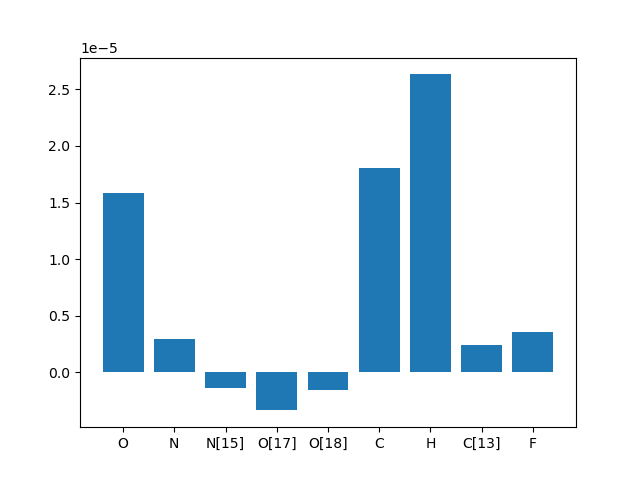

In [25]:
%matplotlib notebook
#calculateMassUncertainty(df)
calculateMassUncertainty(df, True, True)